<a href="https://colab.research.google.com/github/jcbertucci/MVP_-Machine-Learning-Analytics/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# URL do arquivo no GitHub (substitua pela sua URL raw)
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel do GitHub
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica (substitua pelo nome correto da planilha)
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
df.head()


Planilhas disponíveis: ['amazon_uk_shoes_products_datase']


,url,Nome do produto,Nome do avaliador,título da avaliação,texto da avaliação,nota,compra verificada,data avaliação,votos úteis,uniq_id,data extração
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1.0,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24 02:26:00
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1.0,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,2021-12-24 02:26:00
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,1.0,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,2021-12-24 02:26:00
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,1.0,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,2021-12-24 02:26:00
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,1.0,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,2021-12-24 02:26:00


Valores ausentes em cada coluna:
 url                      84
Nome do produto         105
Nome do avaliador       105
título da avaliação     106
texto da avaliação      121
nota                    145
compra verificada       145
data avaliação          138
votos úteis            4998
uniq_id                 141
data extração           145
dtype: int64

Resumo estatístico das colunas numéricas:
              nota  compra verificada                  data extração
count  6804.000000        6804.000000                           6804
mean      4.132716           0.998089  2021-12-24 02:27:29.770723072
min       1.000000           0.000000            2021-12-24 02:26:00
25%       4.000000           1.000000            2021-12-24 02:27:00
50%       5.000000           1.000000            2021-12-24 02:28:00
75%       5.000000           1.000000            2021-12-24 02:28:00
max       5.000000           1.000000            2021-12-24 02:29:00
std       1.336358           0.043672             

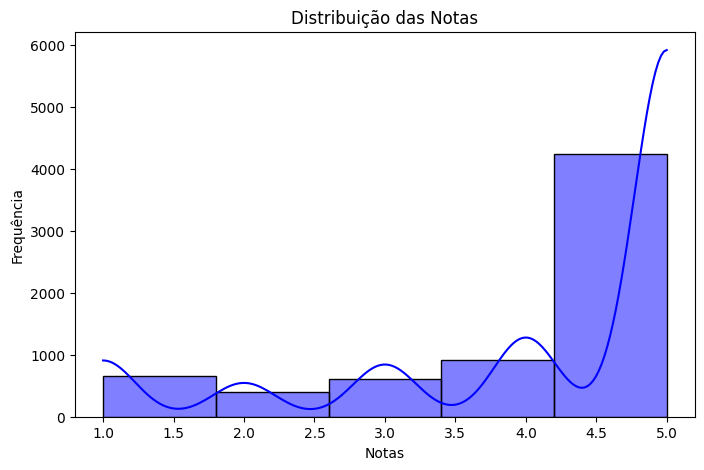

<ipython-input-5-c65cb1bfc47c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


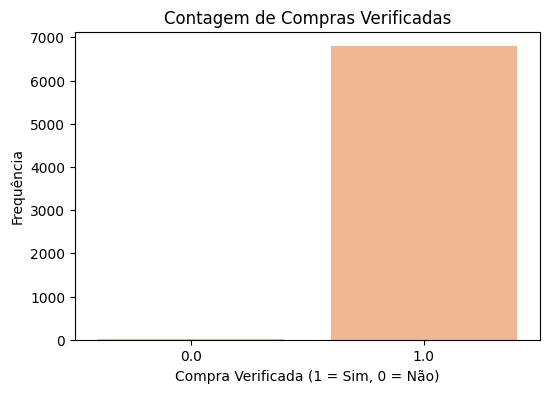

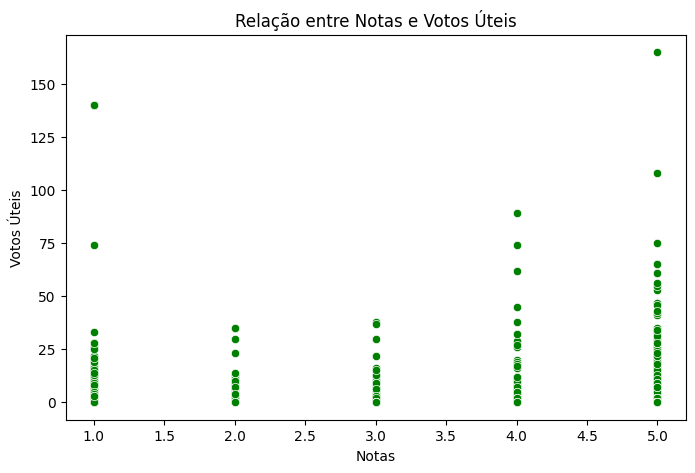

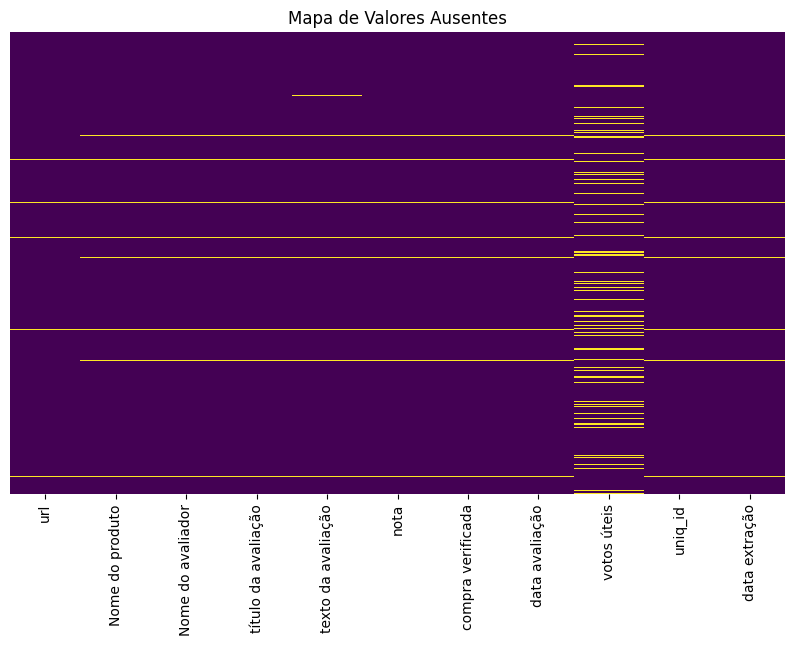

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL do arquivo no GitHub (verifique a URL raw)
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel do GitHub
data = pd.ExcelFile(url)
df = data.parse('amazon_uk_shoes_products_datase')

# Verificando valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes em cada coluna:\n", missing_values)

# Resumo estatístico das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(df.describe())

# Histograma para a distribuição da "nota"
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de valores na coluna "compra verificada"
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada (1 = Sim, 0 = Não)')
    plt.ylabel('Frequência')
    plt.show()

# Relação entre "nota" e "votos úteis"
if 'votos úteis' in df.columns:
    # Transformando "votos úteis" para um formato numérico
    df['votos úteis'] = df['votos úteis'].fillna('0').str.extract('(\d+)').astype(float)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='nota', y='votos úteis', data=df, color='green')
    plt.title('Relação entre Notas e Votos Úteis')
    plt.xlabel('Notas')
    plt.ylabel('Votos Úteis')
    plt.show()

# Heatmap de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()


Valores ausentes:
 url                     84
Nome do produto        105
Nome do avaliador      105
título da avaliação    106
texto da avaliação     121
nota                   145
compra verificada      145
data avaliação         138
votos úteis            849
uniq_id                141
data extração          145
dtype: int64


<ipython-input-6-b7e052890d3b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))


Accuracy: 0.87409200968523

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.27      0.42       208
    positive       0.87      1.00      0.93      1031

    accuracy                           0.87      1239
   macro avg       0.90      0.63      0.68      1239
weighted avg       0.88      0.87      0.84      1239



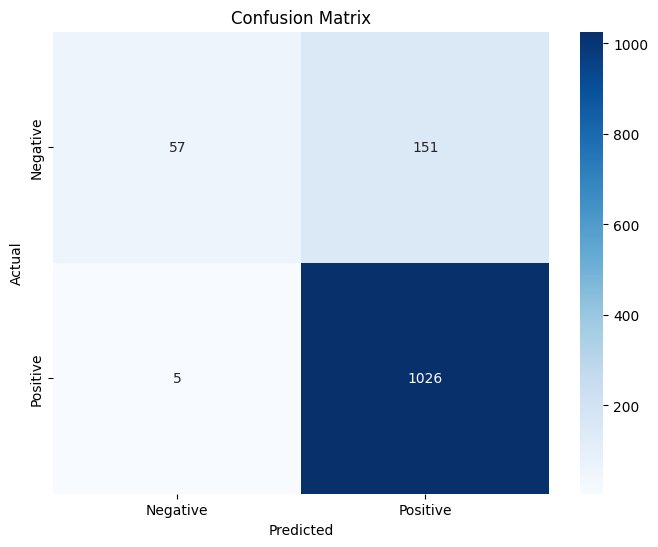

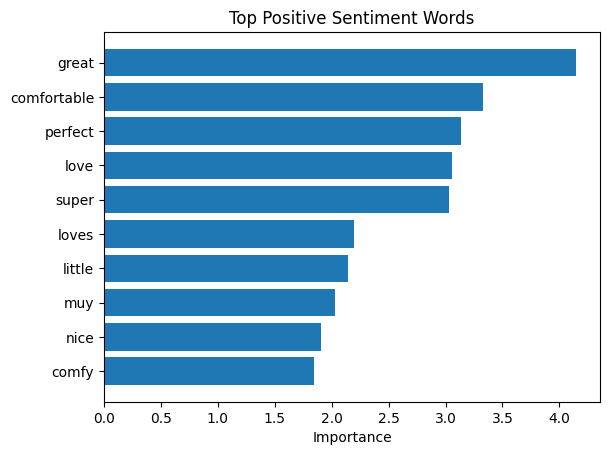

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic info and check for missing values
print("Valores ausentes:\n", df.isnull().sum())

# Preprocessing: Filter out neutral ratings (e.g., ratings == 3)
df = df[df['nota'].notnull()]  # Ensure 'nota' column has no missing values
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]

# Remove missing or invalid rows for 'texto da avaliação'
df = df[df['texto da avaliação'].notnull()]

# Splitting dataset into training and test sets
X = df['texto da avaliação']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance (Top words)
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]
top_features = np.argsort(coef)[-10:]
plt.barh([feature_names[i] for i in top_features], coef[top_features])
plt.title('Top Positive Sentiment Words')
plt.xlabel('Importance')
plt.show()


Planilhas disponíveis: ['amazon_uk_shoes_products_datase']
Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ver

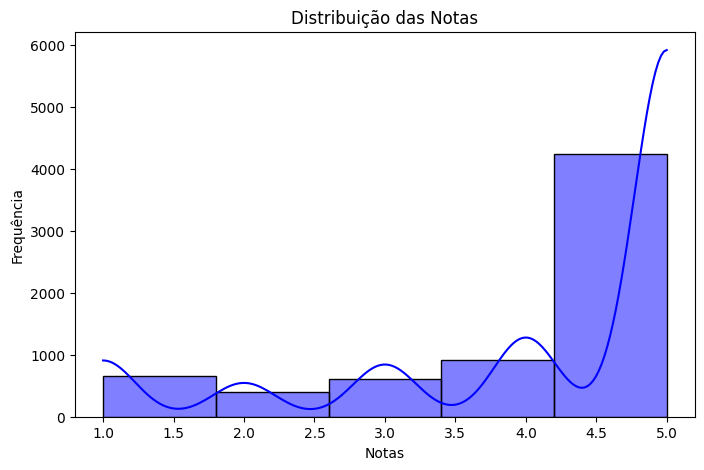

<ipython-input-7-d48b2d71cf93>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


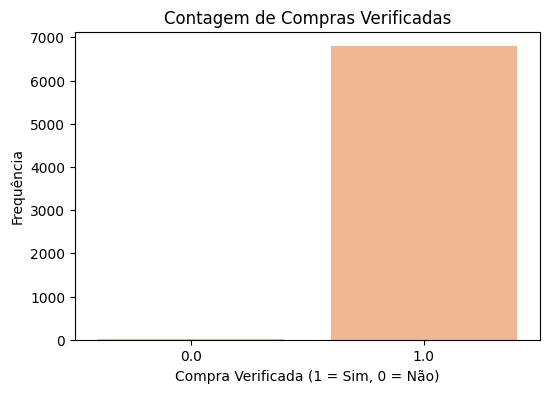

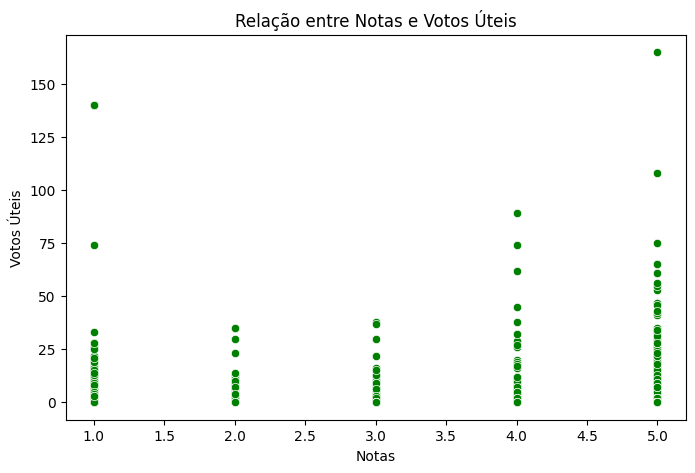

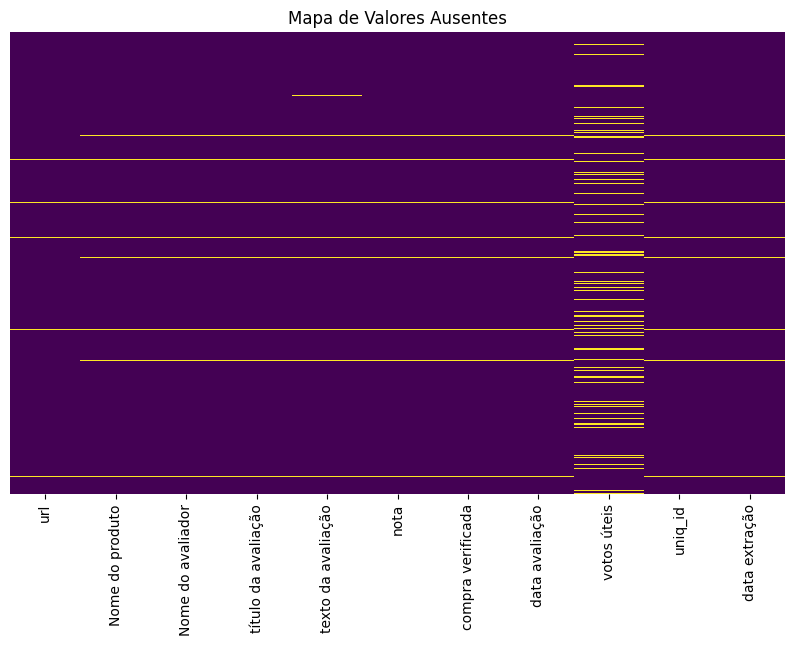

<ipython-input-7-d48b2d71cf93>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))



Dados após a preparação para classificação:
   nota sentiment                                 texto da avaliação
0   5.0  positive  Love these. Was looking for converses and thes...
1   2.0  negative  The shoes are very cute, but after the 2nd day...
2   5.0  positive                                       Good quality
3   5.0  positive                                              Great
4   5.0  positive  Ho scelto il modello bianco con rifinitura die...

Divisão concluída: 4954 exemplos de treino e 1239 de teste.

Modelo treinado com sucesso!

Acurácia do Modelo: 0.87409200968523

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.92      0.27      0.42       208
    positive       0.87      1.00      0.93      1031

    accuracy                           0.87      1239
   macro avg       0.90      0.63      0.68      1239
weighted avg       0.88      0.87      0.84      1239



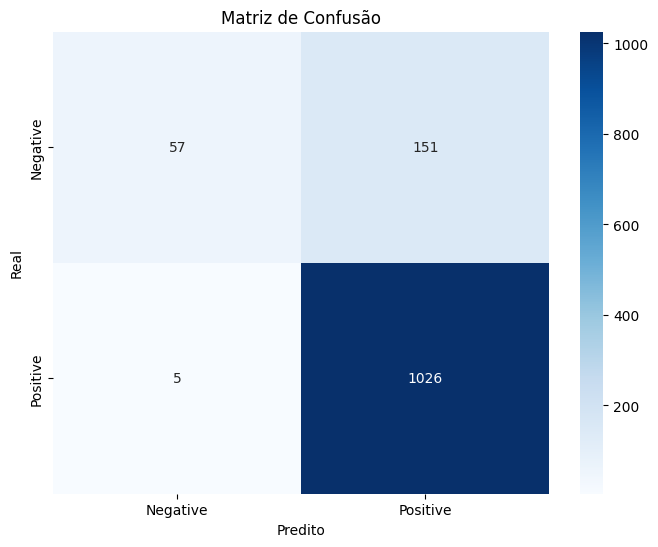

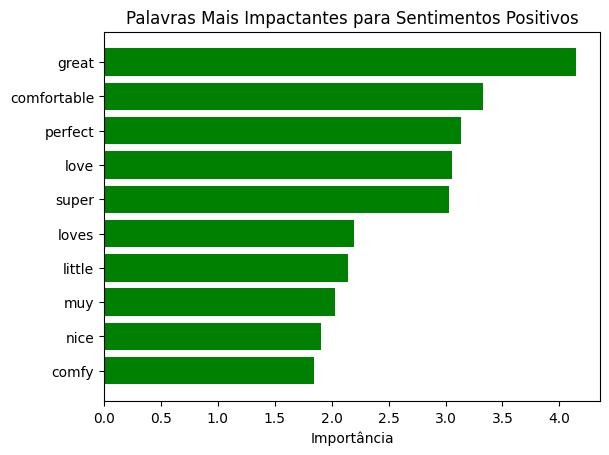

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========================================
# 1. Carregamento do Dataset
# ========================================
# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())

# ========================================
# 2. Análise e Limpeza de Dados
# ========================================
# Verificando valores ausentes em cada coluna
missing_values = df.isnull().sum()
print("\nValores ausentes:\n", missing_values)

# Resumo estatístico das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(df.describe())

# ========================================
# 3. Exploração Inicial dos Dados
# ========================================

# Histograma para a distribuição da "nota"
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de valores na coluna "compra verificada"
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada (1 = Sim, 0 = Não)')
    plt.ylabel('Frequência')
    plt.show()

# Relação entre "nota" e "votos úteis"
if 'votos úteis' in df.columns:
    df['votos úteis'] = df['votos úteis'].fillna('0').str.extract('(\d+)').astype(float)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='nota', y='votos úteis', data=df, color='green')
    plt.title('Relação entre Notas e Votos Úteis')
    plt.xlabel('Notas')
    plt.ylabel('Votos Úteis')
    plt.show()

# Heatmap de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()

# ========================================
# 4. Preparação para Classificação Sentimental
# ========================================
# Filtrar avaliações neutras (nota == 3 não será considerada)
df = df[df['nota'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]

# Remover linhas com textos ausentes
df = df[df['texto da avaliação'].notnull()]

# Verificar os dados preparados
print("\nDados após a preparação para classificação:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())

# ========================================
# 5. Divisão dos Dados em Treino e Teste
# ========================================
# Separando texto (X) e rótulos (y)
X = df['texto da avaliação']
y = df['sentiment']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nDivisão concluída: {} exemplos de treino e {} de teste.".format(len(X_train), len(X_test)))

# ========================================
# 6. Vetorização dos Textos (TF-IDF)
# ========================================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 7. Treinamento do Modelo (Regressão Logística)
# ========================================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)
print("\nModelo treinado com sucesso!")

# ========================================
# 8. Avaliação do Modelo
# ========================================
# Previsões no conjunto de teste
y_pred = model.predict(X_test_vec)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurácia do Modelo:", accuracy)

# Relatório de Classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# ========================================
# 9. Palavras Mais Impactantes
# ========================================
# Analisando a importância das palavras
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

# Principais palavras positivas
top_positive = np.argsort(coef)[-10:]
plt.barh([feature_names[i] for i in top_positive], coef[top_positive], color='green')
plt.title('Palavras Mais Impactantes para Sentimentos Positivos')
plt.xlabel('Importância')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Configurando os hiperparâmetros para otimização
param_grid = {
    'C': [0.1, 1, 10],  # Parâmetro de regularização
    'solver': ['liblinear', 'lbfgs']  # Algoritmos de otimização
}

# Otimização com GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

# Melhor modelo e parâmetros
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Reavaliando o modelo otimizado
y_pred_optimized = best_model.predict(X_test_vec)
print("Acurácia (modelo otimizado):", accuracy_score(y_test, y_pred_optimized))
print("\nRelatório de Classificação (modelo otimizado):\n", classification_report(y_test, y_pred_optimized))


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}
Acurácia (modelo otimizado): 0.9055690072639225

Relatório de Classificação (modelo otimizado):
               precision    recall  f1-score   support

    negative       0.84      0.54      0.66       208
    positive       0.91      0.98      0.95      1031

    accuracy                           0.91      1239
   macro avg       0.88      0.76      0.80      1239
weighted avg       0.90      0.91      0.90      1239



In [9]:
# Avaliação no conjunto de treinamento
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_vec))
test_accuracy = accuracy_score(y_test, y_pred_optimized)

print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

if train_accuracy > test_accuracy + 0.05:
    print("Possível overfitting detectado.")


Acurácia no conjunto de treinamento: 0.9878885748889786
Acurácia no conjunto de teste: 0.9055690072639225
Possível overfitting detectado.


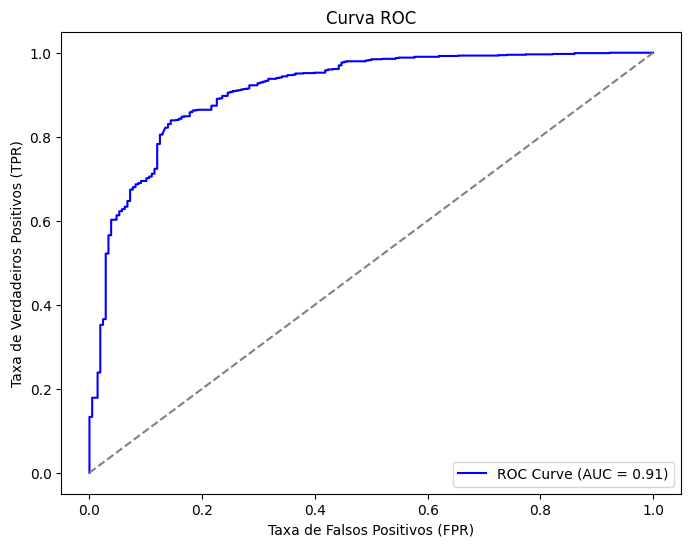

In [10]:
from sklearn.metrics import roc_curve, auc

# Calculando a curva ROC
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.show()


In [11]:
from sklearn.pipeline import Pipeline

# Criando o pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver']))
])

# Treinando o pipeline
pipeline.fit(X_train, y_train)

# Avaliando o pipeline
y_pipeline_pred = pipeline.predict(X_test)
print("Acurácia (Pipeline):", accuracy_score(y_test, y_pipeline_pred))


Acurácia (Pipeline): 0.9055690072639225


In [12]:
import joblib

# Salvando o pipeline treinado
joblib.dump(pipeline, 'sentiment_analysis_pipeline.pkl')

# Para carregar no futuro
# pipeline = joblib.load('sentiment_analysis_pipeline.pkl')


['sentiment_analysis_pipeline.pkl']

Planilhas disponíveis: ['amazon_uk_shoes_products_datase']

Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ve

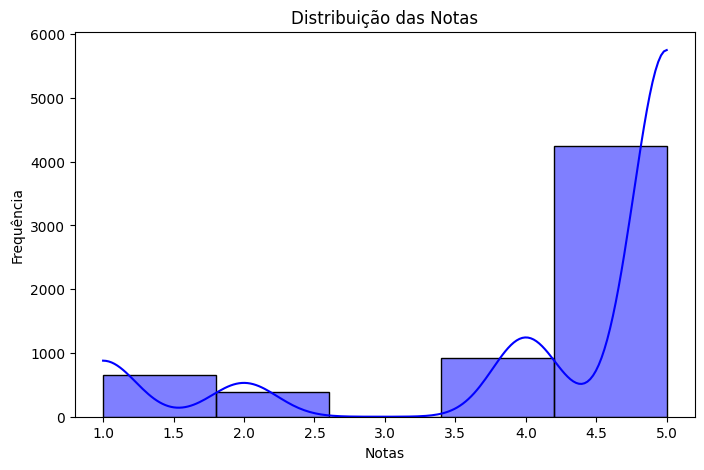

<ipython-input-13-aadfe983b952>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


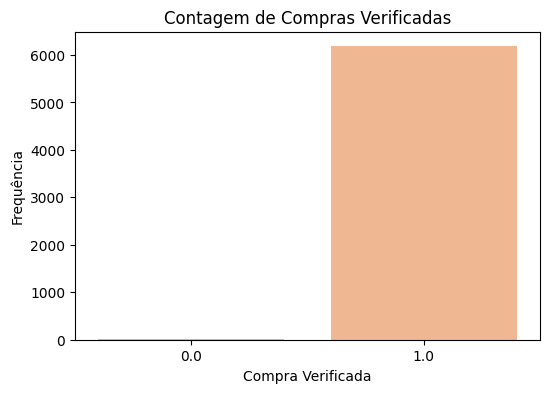

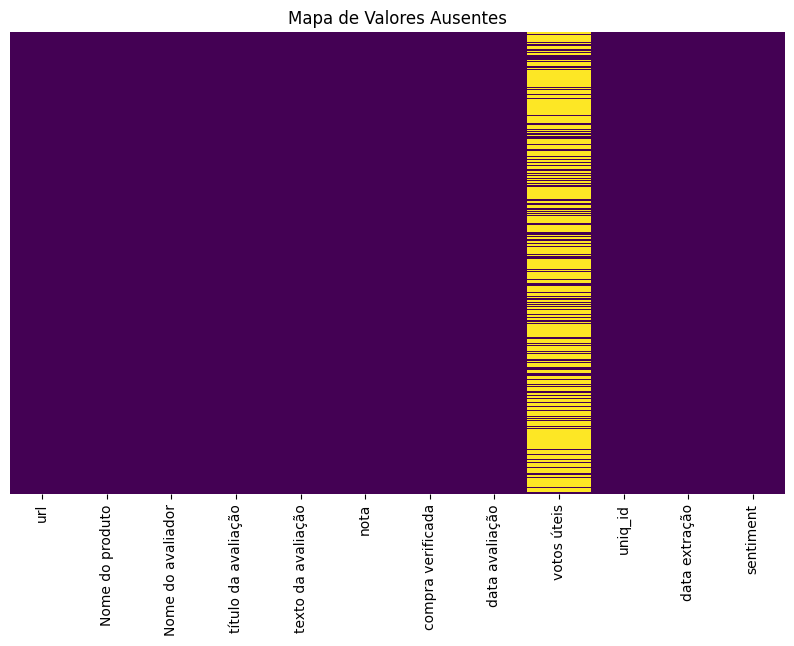


Tamanho do conjunto de treinamento: 4954
Tamanho do conjunto de teste: 1239

Acurácia do Modelo: 0.87409200968523

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.92      0.27      0.42       208
    positive       0.87      1.00      0.93      1031

    accuracy                           0.87      1239
   macro avg       0.90      0.63      0.68      1239
weighted avg       0.88      0.87      0.84      1239



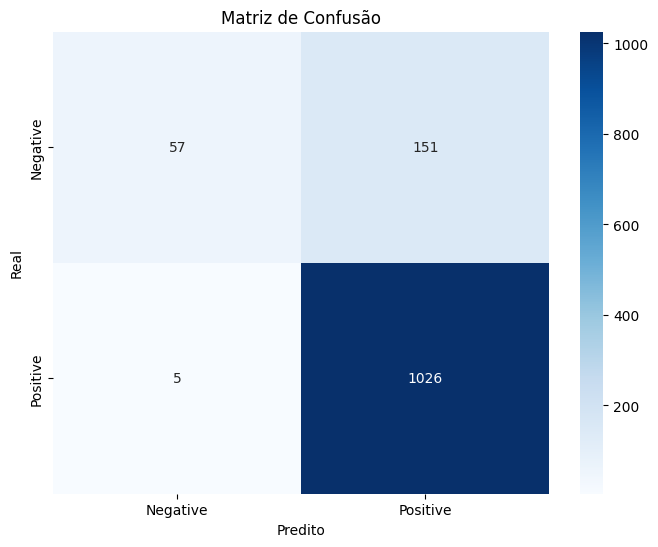


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}

Acurácia após otimização: 0.9055690072639225


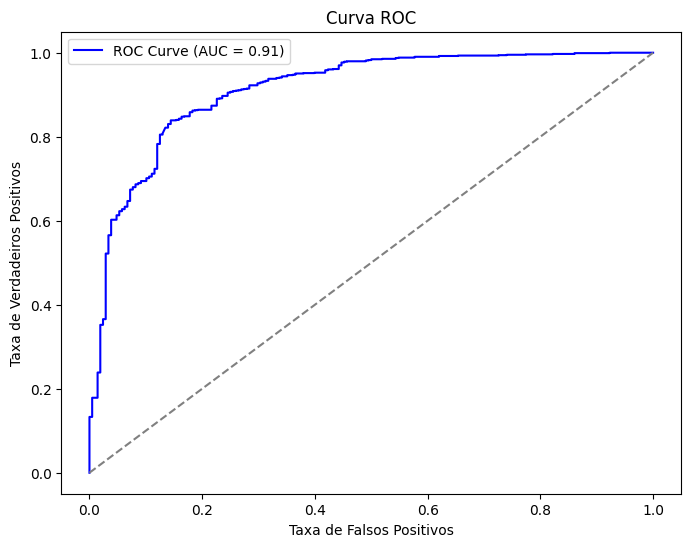


Acurácia usando Pipeline: 0.9055690072639225

Modelo salvo como 'sentiment_analysis_pipeline.pkl'


In [13]:
# ========================================
# Importação de Bibliotecas
# ========================================
# Importa as bibliotecas necessárias para manipulação de dados, visualização, modelagem e salvamento.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib

# ========================================
# 1. Carregamento do Dataset
# ========================================
# Objetivo: Carregar os dados de avaliações para análise e modelagem.
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

data = pd.ExcelFile(url)  # Lê o arquivo Excel
df = data.parse('amazon_uk_shoes_products_datase')  # Lê a aba específica do arquivo Excel

# Verificar planilhas disponíveis e visualizar as primeiras linhas do dataset.
print("Planilhas disponíveis:", data.sheet_names)
print("\nVisualização inicial do dataset:")
print(df.head())

# ========================================
# 2. Análise e Limpeza de Dados
# ========================================
# Objetivo: Limpar os dados e preparar o dataset para análise.
# - Identifica valores ausentes.
# - Cria os rótulos de sentimentos (positivo/negativo).
# - Remove valores neutros e textos ausentes.
print("\nValores ausentes por coluna:\n", df.isnull().sum())
print("\nResumo estatístico:\n", df.describe())

# Criar rótulos de sentimento com base nas notas
df = df[df['nota'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]  # Remove notas neutras

# Remove linhas com textos ausentes
df = df[df['texto da avaliação'].notnull()]
print("\nDados após limpeza e criação de rótulos:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())

# ========================================
# 3. Visualizações Exploratórias
# ========================================
# Objetivo: Explorar a distribuição de dados e características importantes.
# Histograma para analisar a distribuição das notas.
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de compras verificadas
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada')
    plt.ylabel('Frequência')
    plt.show()

# Heatmap para verificar valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()

# ========================================
# 4. Divisão do Dataset
# ========================================
# Objetivo: Dividir o dataset em treino (80%) e teste (20%).
X = df['texto da avaliação']  # Dados de entrada (texto)
y = df['sentiment']  # Rótulos de saída (positivo/negativo)

# Divide o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# ========================================
# 5. Vetorização dos Textos
# ========================================
# Objetivo: Converter os textos em representações numéricas usando TF-IDF.
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 6. Treinamento e Avaliação do Modelo
# ========================================
# Objetivo: Treinar o modelo inicial e avaliar o desempenho básico.
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test_vec)

# Avaliação do modelo inicial
print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão para análise detalhada
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# ========================================
# 7. Otimização de Hiperparâmetros
# ========================================
# Objetivo: Melhorar o desempenho ajustando os parâmetros do modelo.
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

# Avaliar o modelo otimizado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_vec)
print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print("\nAcurácia após otimização:", accuracy_score(y_test, y_pred_optimized))

# ========================================
# 8. Avaliação Avançada (Curva ROC)
# ========================================
# Objetivo: Avaliar a capacidade do modelo de distinguir entre classes.
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

# ========================================
# 9. Implementação com Pipeline
# ========================================
# Objetivo: Criar um pipeline para integrar vetorização e modelo.
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver']))
])

pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)
print("\nAcurácia usando Pipeline:", accuracy_score(y_test, y_pipeline_pred))

# ========================================
# 10. Salvando o Modelo Treinado
# ========================================
# Objetivo: Salvar o pipeline treinado para reuso futuro.
joblib.dump(pipeline, 'sentiment_analysis_pipeline.pkl')
print("\nModelo salvo como 'sentiment_analysis_pipeline.pkl'")
